In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
f1 = 2
w1 = np.pi * 2 * f1
f2 = 5
w2 = np.pi * 2 * f2

(0.0, 1.0, -2.0, 2.0)

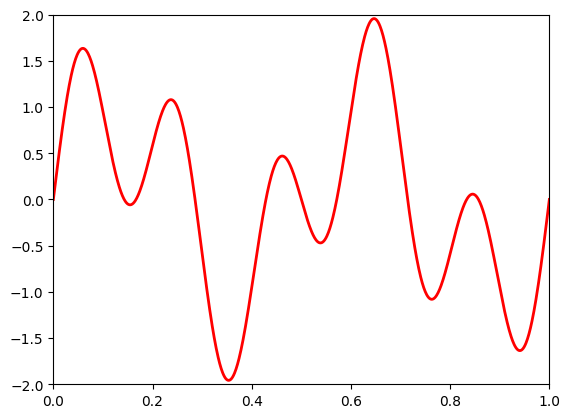

In [32]:
# Here's the original function from which samples will be drawn.
ts0 = np.linspace(0, 1, 1000)
T = 0.2
tau = 0.25
A = 3.5
f = [(np.sin(w1 * i) + np.sin(w2 * i)) for i in ts0]
plt.plot(ts0,f, 'r-', linewidth = 2)
plt.axis((0, 1, -2, 2))

In [33]:
# Now do the sampling.  There are Ns samples between -tmax and +tamx.
# Therefore the time between samples is 2*tmax/(Ns - 1), or the sample
# frequency is (Ns - 1)/(2*tmax).
Ns = 1001
tmax = 1
ts = np.linspace(-tmax, tmax, Ns)
ys = (np.sin(w1 * ts) + np.sin(w2 * ts))
for i in range(Ns):
    if ts[i] < 0:
        ys[i]= 0

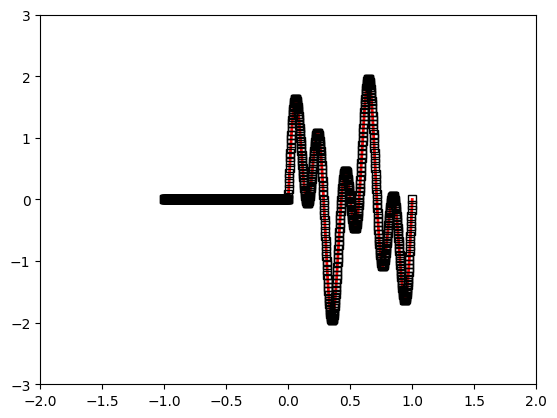

In [34]:
# Plot the samples on top of the original continuous function.

# Original function.
plt.plot(ts0,f, 'r-', linewidth = 2)
plt.axis((-2, 2, -3, 3))

# Add the samples.
plt.plot(ts, ys, 'ks', fillstyle = 'none')

In [35]:
# Here again are the sampling period and frequency.
Ts = ts[2] - ts[1]
fs = 1/Ts
Ts, fs

(0.0020000000000000018, 499.99999999999955)

In [36]:
# Define a function of t.  This function will become our reconstructed signal.
# The reconstrcution will be done using the sinc function!
def yRe(t):
    z = 0
    for i in range(-int((Ns-1)/2), int((Ns-1)/2), 1):
        n = int(i + (Ns-1)/2 + 1)
        z += ys[n]*np.sin(np.pi*fs*(t - i*Ts))/(np.pi*fs*(t - i*Ts))
    return z

(0.0, 1.0, -2.0, 2.0)

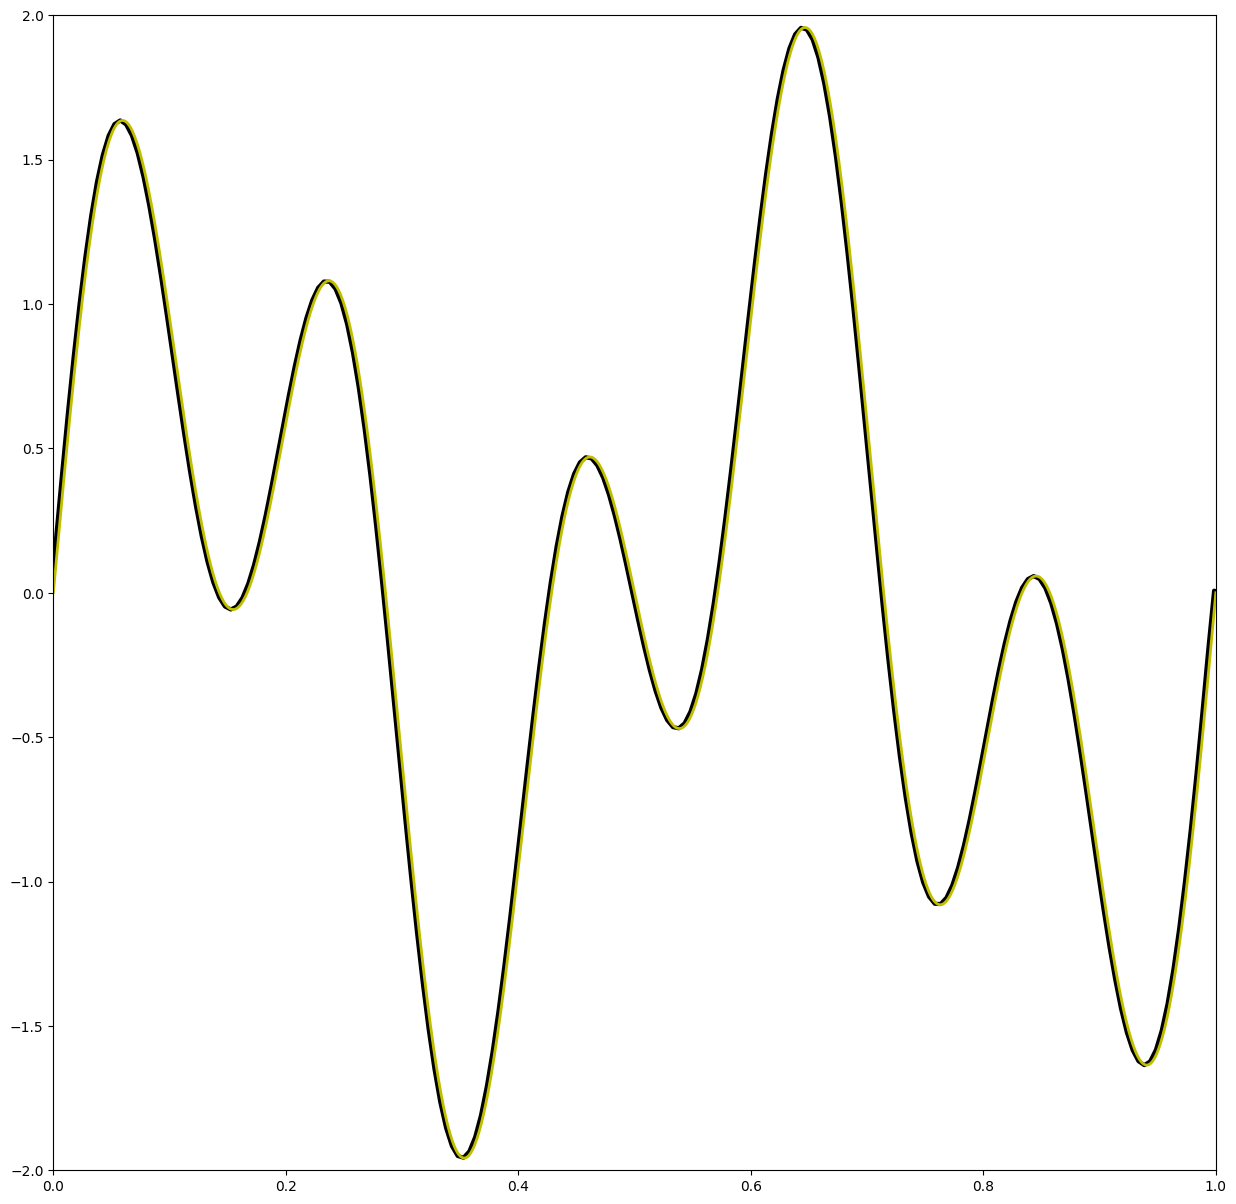

In [38]:
# Now make some time values and plot the reconstructed signal (black line)
# along with the origonal continuous function (yellow line).
plt.figure(figsize=(15,15))
tt = np.linspace(-2.5, 2.5, 1000)
plt.plot(tt, yRe(tt), 'k-', linewidth = 3)
plt.plot(ts0, f, 'y-', linewidth = 2)
plt.axis((0, 1, -2, 2))